<a href="https://colab.research.google.com/github/askazera/CaseAirbnb/blob/main/Projeto03_Case_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 03 - Case Airbnb**

SoulCode Academy

Bootcamp Analista de Dados - AD2

Período: semana 6

Professores: Franciane Rodrigues e Douglas Ribeiro

Aluno: Aska Victoria Pereira Moreno


# **Requisitos**

**Nível - Tratamento e Análise**

<br>

- Verificar todos os passos da estratégia geral de análise de dados;

- Executar o que for necessário;

- Todos os passos devem ser comentados;

- Realizar no mínimo 3 análises apenas numéricas;

- Realizar plotagens para no mínimo 3 análises;

- Chegar a uma conclusão de sua análise;

<br>



---


**Nivel Infra**

- O Dataset deve ser salvo em ambiente local  (Google Drive) - (bruto e tratado)

- Dataset deve ser salvo em ambiente cloud (Cloud Storage) - (bruto e tratado)

- O Arquivo original e tratado deve ser salvo em MongoDB Atlas em coleções diferentes

<br>


---


**O que será analisado:**

- Pontualidade;

- Organização de código;
- Atendimento aos requisitos;
- Capacidade de Pesquisa e Autonomia;
- Aplicação da Estratégia Geral de Análise de Dados;


# **Pergunta de negócio**

Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.


# **Dataset**

- Foi realizado um experimento automatizado baseado em web-scraping a fim de  coletar ofertas do Airbnb que seriam apresentadas a um usuário real.
- O experimento usou o framework Selenium WebDriver para buscar acomodações para duas pessoas durante duas noites em 10 grandes cidades europeias na plataforma Airbnb.
- As ofertas foram coletadas entre quatro a seis semanas antes das datas da viagem e os preços incluíam taxa de reserva e taxa de limpeza.
- Para cada cidade, foram criados dois conjuntos de dados separados: um para dias de semana úteis (terça a quinta-feira) e outro para finais de semana (sexta a domingo).
- A análise se concentra nos dados coletados durante os dias úteis da semana, enquanto os dados do fim de semana são usados para garantir a solidez  dos resultados.

**Estudo de caso - Amsterdã:**

- A análise será feita com base nos dados do Airbnb de Amsterdã, contendo informações sobre os preços, como o número de quartos, tipo de quarto, status de host, distância do centro da cidade e outros atributos.

- *Importante ressaltar que a base de dados a ser analisada é a base semanal para dias úteis (terça à quinta-feira). *

<br>
Fontes:

[Determinants of Airbnb prices in European cities: A spatial econometrics approach](https://www.sciencedirect.com/science/article/pii/S0261517721000388?via%3Dihub#sec3)

[Airbnb Price Determinants in Europe](https://www.kaggle.com/datasets/thedevastator/airbnb-price-determinants-in-europe)

# **Dicionário**

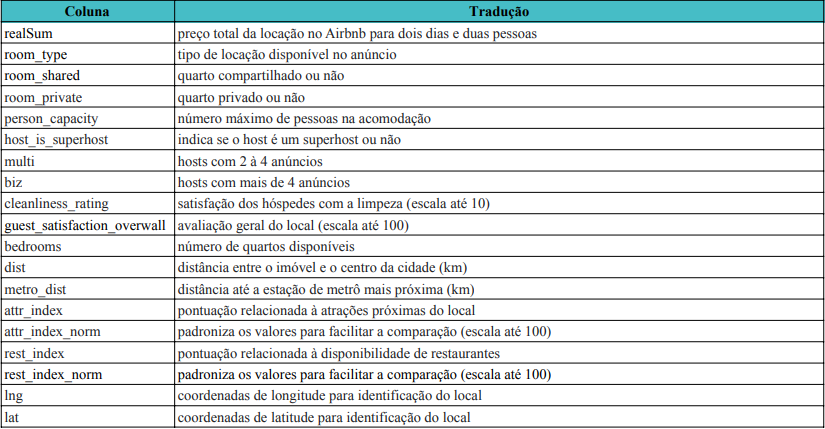

***Legenda auxiliar***

*bedrooms: alguns valores são 0, isso significa que não há quartos pois pode ser um imóvel do tipo studio, kitnet, flat.<br>
*superhost: um host (anfitrião) que contém muitas avaliações positivas.<br>
*attr_index: atividades locais, turismo, lazer.<br>
*rest_index: experiências gastronômicas próximas ou no local.<br>
*attr_index_norm: escala de avaliação até 100.<br>
*rest_index_norm: escala de avaliação até 100.<br>

# **Problema de negócio - 5W**

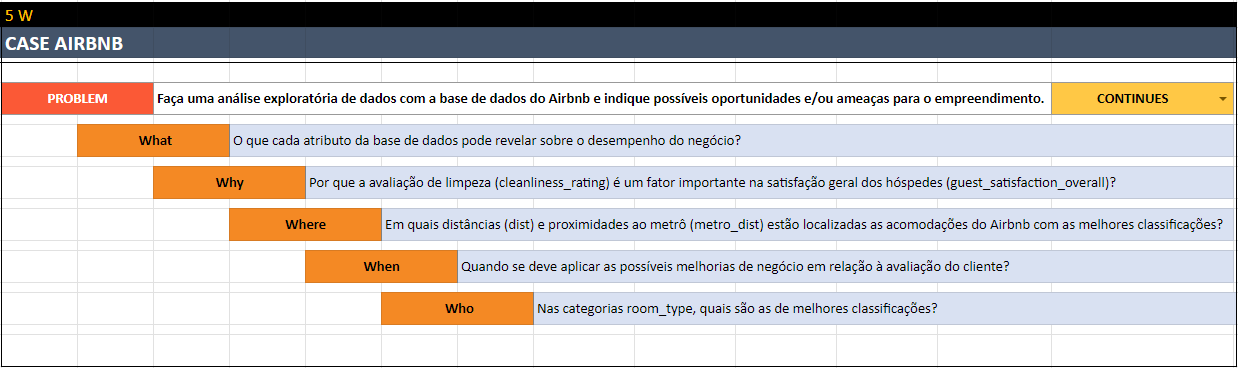

# **Instalações e Importações**

In [ ]:
!pip install gcsfs
!pip install pandera

In [ ]:
import pandas as pd
import numpy as np
import os
import pandera as pa
import matplotlib.pyplot as plt
from  google.cloud import storage
from google.colab import drive

In [ ]:
# desconsiderando possíveis avisos avisos
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Configuração da quantidade máxima de colunas
pd.set_option('display.max_columns',100)

# **Extração**

In [ ]:
# Opção de extrção pelo Google Drive
# Comando de abertura para Google Drive no colab

#from google.colab import drive # importando arquivos do drive para o colab
#drive.mount('/content/drive')   # caminho para arquivos no drive

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/SoulCode/Prof Francianne/PROJETO /airbnb.csv',
                 #encoding='UTF-8')

In [ ]:
# Extraindo pela GCP (Cloud)
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO

serviceAccount = '/content/my-project-one-390016-317d23542762.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET

client = storage.Client()
bucket = client.get_bucket('cloud-girl')
bucket.blob('airbnb.csv')
path = 'gs://cloud-girl/tabelas_bruto/airbnb.csv'

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)

df = pd.read_csv(path,
                 encoding='UTF-8')
dfback = df.copy()

# **Pré-Análise**

In [ ]:
# visualização do DataFrame em forma "bruta"
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
# Analisando o tipo de cada coluna
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [ ]:
# Informações detalhadas do DF (DataFrame)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [ ]:
# BACKUP 1
# Primeiro backup do DataFrame
dfback1 = df.copy()

# **TRANSFORMAÇÃO**

Verificações gerais e básicas de qualquer base de dados, se houver os casos abaixo:

- Escolher as possíveis colunas importantes para a análise;
- Verificar se há colunas iguais;
- Verificação e tratamento de valores (ou observações) únicos;
- Verificação e tratamento de duplicadas
- Verificação e tratamento de inconsistência
- Verificação e tratamento de valores nulos
- Tradução/Renomeação
- Transformação de tipos adequados dos dados
- Garantia de qualidade e integridade dos dados

In [ ]:
# verificando valores redundantes

# nas colunas room_shared e room_private verificamos que retornam os mesmos valores (True/ False) para o mesmo objetivo
# portanto não seria interessante deixá-las na tabela, para evitar redundâncias

print(pd.unique(dfback1['room_shared']))
print(pd.unique(dfback1['room_private']))

# permanecerá a coluna room_type, que indicará o tipo de locação

print(pd.unique(dfback1['room_type']))

# as colunas attr_index, attr_index_norm informam mesmos resultados
# será mantido apenas attr_index_norm já que retorna os valores padronizados

# o mesmo será feito em relação à rest_index e rest_index_norm




[False  True]
[ True False]
['Private room' 'Entire home/apt' 'Shared room']


In [ ]:
# drop de colunas redundantes

df.drop(['room_private', 'room_shared', 'attr_index', 'rest_index'],axis=1,inplace=True)

In [ ]:
# Correlação

''' A partir da correlação dos atributos será analisado qual será o foco da
análise com base nos dados e a partir disso iremos trabalhar apenas com esses
atributos específicos'''

# A correlação é feita a partir de registros quantitativos
# será necessário realizar a transformação de dados qualitativos/booleanos para quantitativos

' A partir da correlação dos atributos será analisado qual será o foco da\nanálise com base nos dados e a partir disso iremos trabalhar apenas com esses\natributos específicos'

In [ ]:
# Verificando os registros das colunas que são qualitativas e/ou booleanas a fim de transformação

df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index_norm               float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [ ]:
# Com o comando dtypes foram verificadas as colunas object e bool, que iremos transformar para int

# Colunas que serão transformadas: 'room_private', 'host_is_superhost'

# Verificação de valores unicos nas colunas

print(pd.unique(df['room_type']))
print(pd.unique(df['host_is_superhost']))

['Private room' 'Entire home/apt' 'Shared room']
[False  True]


In [ ]:
# Alterando os valores das colunas com replace

df['room_type'] = df['room_type'].replace(['Private room', 'Entire home/apt', 'Shared room'], [1, 2, 3])
df['host_is_superhost'] = df['host_is_superhost'].replace([False, True], [0,1])

In [ ]:
# Vissualizando se as transformações de tipagem foram bem sucedidas
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                       int64
person_capacity               float64
host_is_superhost               int64
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index_norm               float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [ ]:
# Verificando se há colunas duplicadas

# columns: retorna o nome de cada coluna do DataFrame
# duplicated(): método pandas que retorna um valor booleano para colunas duplicadas

colunas_duplicadas = df.columns[df.columns.duplicated()] # variável que armazena o index das colunas duplicadas

if not colunas_duplicadas.empty: # empty: verifica se a lista colunas_duplicadas está vazia
    print("Existem colunas iguais  DataFrame.")
    print("Colunas duplicadas:", colunas_duplicadas.tolist()) # tolist retorna uma lista de colunas duplicadas
else:
    print("Não existem colunas duplicadas no DataFrame.")

Não existem colunas duplicadas no DataFrame.


In [ ]:
# Verificando se há valores nulos na tabela
df.isnull().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index_norm               0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [ ]:
# BACKUP 2
dfback2 = df.copy()

In [ ]:
# Realizando a correlação e retornando um dicionário com as correlações mais fortes

# É possível considerar que uma correlação é forte a partir de 0.6 e -0.6
# por isso, foi considerado apenas a partir desse valor

correlacoes = df.corr()

correlacoes_filtradas = correlacoes[((correlacoes >= 0.6) & (correlacoes < 1)) | ((correlacoes <= -0.6) & (correlacoes > -1))]

lista_correlacoes = correlacoes_filtradas.unstack().dropna().to_dict()

print(lista_correlacoes)

{('person_capacity', 'bedrooms'): 0.6607763522512548, ('cleanliness_rating', 'guest_satisfaction_overall'): 0.6488091506956651, ('guest_satisfaction_overall', 'cleanliness_rating'): 0.6488091506956651, ('bedrooms', 'person_capacity'): 0.6607763522512548, ('dist', 'attr_index_norm'): -0.705350955490834, ('dist', 'rest_index_norm'): -0.7516323929688864, ('attr_index_norm', 'dist'): -0.705350955490834, ('attr_index_norm', 'rest_index_norm'): 0.8612561205482203, ('rest_index_norm', 'dist'): -0.7516323929688864, ('rest_index_norm', 'attr_index_norm'): 0.8612561205482203}


In [ ]:
# colunas que serão trabalhadas na analise:

'''
[bedrooms, person_capacity, cleanliness_rating, guest_satisfaction_overall,
dist, attr_index_norm, rest_index_norm]
'''

'\n[bedrooms, person_capacity, cleanliness_rating, guest_satisfaction_overall,\ndist, attr_index_norm, rest_index_norm]\n'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   int64  
 3   person_capacity             1103 non-null   float64
 4   host_is_superhost           1103 non-null   int64  
 5   multi                       1103 non-null   int64  
 6   biz                         1103 non-null   int64  
 7   cleanliness_rating          1103 non-null   float64
 8   guest_satisfaction_overall  1103 non-null   float64
 9   bedrooms                    1103 non-null   int64  
 10  dist                        1103 non-null   float64
 11  metro_dist                  1103 non-null   float64
 12  attr_index_norm             1103 non-null   float64
 13  rest_index_norm             1103 

In [ ]:
# DROP de colunas que não serão utilizadas para a análise de negócio

df.drop(['realSum', 'room_type', 'multi', 'biz', 'host_is_superhost',
         'metro_dist','lng', 'lat' ],axis=1,inplace=True)

**Checando se há inconsistências**

In [ ]:
# Visualiza valores unicos para ver inconsistências. Utilize a função sorted() para ordenação
print(sorted(pd.unique(df['person_capacity'])))

[2.0, 3.0, 4.0, 5.0, 6.0]


In [ ]:
# Visualiza valores unicos para ver inconsistências. Utilize a função sorted() para ordenação
print(sorted(pd.unique(df['cleanliness_rating'])))

[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [ ]:
# Visualiza valores unicos para ver inconsistências. Utilize a função sorted() para ordenação
print(sorted(pd.unique(df['guest_satisfaction_overall'])))

[20.0, 47.0, 60.0, 65.0, 70.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


In [ ]:
# Visualiza valores unicos para ver inconsistências. Utilize a função sorted() para ordenação
print(sorted(pd.unique(df['bedrooms'])))

[0, 1, 2, 3, 4, 5]


In [ ]:
# Visualiza valores unicos para ver inconsistências. Utilize a função sorted() para ordenação
print(sorted(pd.unique(df['dist'])))

[0.0150587980705548, 0.099653501265351, 0.11480567677719, 0.1228203248413586, 0.1386645584328363, 0.1613319628315826, 0.1673131477644722, 0.1757999097494184, 0.1847578358707701, 0.1885288278893922, 0.1951980501873343, 0.218366101609283, 0.2224653424234426, 0.2272606763176075, 0.2403669761183767, 0.2613177343616277, 0.2645439121022677, 0.2726701727182661, 0.2746367615057592, 0.2754348902526141, 0.2802043670336476, 0.2802081671693026, 0.2804455866459713, 0.2862270363942465, 0.2872028149662998, 0.2877071439287178, 0.2895266515672745, 0.290728499113068, 0.2963133809226728, 0.2974726347767152, 0.2988822359077754, 0.3345436175529303, 0.3362210405432312, 0.3379457651761013, 0.3396755797229193, 0.3428061638767657, 0.345523840742521, 0.3530819578031284, 0.3537205344170818, 0.3605068051816017, 0.3633454412498557, 0.3639339290695795, 0.3700082752668438, 0.3714395451909041, 0.3720313749795971, 0.3751350635549438, 0.3846115997106273, 0.384862012821602, 0.3940358562606905, 0.3971287274991505, 0.3983

In [ ]:
# Visualiza valores unicos para ver inconsistências. Utilize a função sorted() para ordenação
print(sorted(pd.unique(df['attr_index_norm'])))

[2.1673456408743967, 2.1855835114683333, 2.1892883627850512, 2.204981346002683, 2.224469675481119, 2.225258090625648, 2.258094081573569, 2.2742868589258154, 2.3248878415292205, 2.332920912204972, 2.345553775057998, 2.370688616921286, 2.375320024744887, 2.391276067738343, 2.4023116425607878, 2.4118253877739613, 2.50524655099482, 2.517748644448561, 2.5783094026655737, 2.598447296152109, 2.6118271385747907, 2.616811299877474, 2.640413165178847, 2.663760984179305, 2.719044076193057, 2.780731182344045, 2.783249793584011, 2.7894774161146056, 2.8058641089964875, 2.809895685592754, 2.8098971573355715, 2.835962893971631, 2.8658389095310004, 2.908423718278402, 2.918017015335045, 2.930358290281833, 2.9567705811004106, 3.005422022004508, 3.0222838706273567, 3.0327625016232256, 3.0480436297116493, 3.057741359391762, 3.065481794313694, 3.0775199386451337, 3.0854049487227804, 3.088063075509313, 3.129619295431921, 3.1349989478071083, 3.165188486126733, 3.1658835709850544, 3.205345623336937, 3.21757176

In [ ]:
# Visualiza valores unicos para ver inconsistências. Utilize a função sorted() para ordenação
print(sorted(pd.unique(df['rest_index_norm'])))

[3.545204720017045, 3.5742558686210484, 3.580741523076774, 3.6093932835334464, 3.6402776199564073, 3.640415876858557, 3.695634411752903, 3.729029831417621, 3.80895102312167, 3.821171665476073, 3.841975187138168, 3.886737136423467, 3.8937406343828167, 3.917154151083281, 3.9480179213533257, 3.9504188072549207, 4.118930977288363, 4.140380419612353, 4.235715128070345, 4.272530560560858, 4.291643350976307, 4.305925939759352, 4.339631905797865, 4.3863641662056345, 4.463214756031835, 4.570184473559831, 4.573501193218304, 4.603619759849087, 4.608795395138263, 4.611438863654829, 4.611441437686482, 4.663274589647713, 4.713187676566162, 4.721144898384859, 4.795326145401816, 4.836811750976599, 4.878336402939124, 4.935321329836559, 4.965894656494007, 5.006311052003869, 5.023844083408473, 5.029975994352804, 5.057885686658303, 5.125490405341109, 5.156631669283051, 5.172190009831185, 5.21023813767145, 5.245818009827794, 5.252449545665914, 5.274958531811383, 5.282719150397624, 5.291665708489684, 5.3144

In [ ]:
# BACKUP 3
dfback3 = df.copy()

**Renomeando e traduzindo colunas**

In [ ]:
# Renomeando colunas

'''
[bedrooms, person_capacity, cleanliness_rating, guest_satisfaction_overall,
dist, attr_index_norm, rest_index_norm]
'''

df.rename(columns={'bedrooms':'quartos_disp',
                   'person_capacity': 'cap_pessoas' ,
                   'cleanliness_rating':'avaliação_limpeza',
                   'guest_satisfaction_overall':'avaliação_local',
                   'dist': 'distância',
                   'attr_index_norm': 'atr_local_aval',
                   'rest_index_norm':'rest_local_aval',
                   'Unnamed: 0': 'id'},inplace=True)

In [ ]:
df

,id,cap_pessoas,avaliação_limpeza,avaliação_local,quartos_disp,distância,atr_local_aval,rest_local_aval
0,0,2.0,10.0,93.0,1,5.022964,4.166708,6.846473
1,1,4.0,8.0,85.0,1,0.488389,33.421209,58.342928
2,2,2.0,9.0,87.0,1,5.748312,3.985908,6.646700
3,3,4.0,9.0,90.0,2,0.384862,26.119108,60.973565
4,4,2.0,10.0,98.0,1,0.544738,29.272733,56.811677
...,...,...,...,...,...,...,...,...
1098,1098,2.0,10.0,100.0,1,2.375833,9.594573,15.699521
1099,1099,2.0,10.0,90.0,1,4.719736,5.719989,9.391335
1100,1100,2.0,10.0,92.0,1,0.598355,23.323524,43.616927
1101,1101,4.0,8.0,84.0,5,1.943020,13.658524,23.454022


**Tratamento de dados**

- realizando conversão de tipos nos registros das colunas

In [ ]:
df['distância'] = df['distância'].round(2)

In [ ]:
df['atr_local_aval'] = df['atr_local_aval'].round(1)

In [ ]:
df['rest_local_aval'] = df['rest_local_aval'].round(1)

In [ ]:
df['cap_pessoas'] = df['cap_pessoas'].astype(int)

In [ ]:
df['avaliação_limpeza'] = df['avaliação_limpeza'].astype(int)

In [ ]:
df['avaliação_local'] = df['avaliação_local'].astype(int)

In [ ]:
# BACKUP 4
dfback4 = df.copy()

**Recuperando um atributo de um backup**

In [ ]:
# Recuperando o atributo 'room_type' apenas para fins qualitativos de representação na tabela

df = df.assign(room_type=dfback1['room_type'])

In [ ]:
# renomeando e traduzindo o nome da coluna

df.rename(columns={'room_type':'tipo_de_locação'},inplace=True)

In [ ]:
# traduzindo o nome das categorias para maiúsculo

traducao_tipo_quarto = {
    'Entire home/apt': 'APT/CASA INTEIRA',
    'Shared room': 'QUARTO COMPARTILHADO',
    'Private room': 'QUARTO PRIVADO'
}

# aplicando a tradução na coluna

df['tipo_de_locação'].replace(traducao_tipo_quarto,inplace=True)

**Alterando a posição da coluna "tipo_de_locação" para a primeira posição**

In [ ]:
# Armazenando a coluna em uma variável temporária
coluna_temp = df['tipo_de_locação']

# Removendo a coluna do DataFrame
df = df.drop(columns=['tipo_de_locação'])

# Inserindo a coluna na nova posição desejada
nova_posicao = 1  # Índice da nova posição
df.insert(nova_posicao, 'tipo_de_locação', coluna_temp)

In [ ]:
# BACKUP 5
dfback5 = df.copy()

**Qualidade dos Dados**

In [ ]:
df.dtypes

id                     int64
tipo_de_locação       object
cap_pessoas            int64
avaliação_limpeza      int64
avaliação_local        int64
quartos_disp           int64
distância            float64
atr_local_aval       float64
rest_local_aval      float64
dtype: object

In [ ]:
# Definir o esquema de validação
# usando PANDERA

schema = pa.DataFrameSchema({'id': pa.Column(pa.Int),
                            'tipo_de_locação': pa.Column(pa.String),
                            'cap_pessoas': pa.Column(pa.Int),
                            'avaliação_limpeza': pa.Column(pa.Int),
                            'avaliação_local': pa.Column(pa.Int),
                            'quartos_disp': pa.Column(pa.Int),
                            'distância': pa.Column(pa.Float),
                            'atr_local_aval': pa.Column(pa.Float),
                            'rest_local_aval': pa.Column(pa.Float),
                            })

# Validando o DataFrame
schema.validate(df)

,id,tipo_de_locação,cap_pessoas,avaliação_limpeza,avaliação_local,quartos_disp,distância,atr_local_aval,rest_local_aval
0,0,QUARTO PRIVADO,2,10,93,1,5.02,4.2,6.8
1,1,QUARTO PRIVADO,4,8,85,1,0.49,33.4,58.3
2,2,QUARTO PRIVADO,2,9,87,1,5.75,4.0,6.6
3,3,QUARTO PRIVADO,4,9,90,2,0.38,26.1,61.0
4,4,QUARTO PRIVADO,2,10,98,1,0.54,29.3,56.8
...,...,...,...,...,...,...,...,...,...
1098,1098,APT/CASA INTEIRA,2,10,100,1,2.38,9.6,15.7
1099,1099,QUARTO PRIVADO,2,10,90,1,4.72,5.7,9.4
1100,1100,QUARTO PRIVADO,2,10,92,1,0.60,23.3,43.6
1101,1101,APT/CASA INTEIRA,4,8,84,5,1.94,13.7,23.5


**Backup da tabela tratada**

In [ ]:
# BACKUP 6
dfback6 = df.copy()

# **CARREGAMENTO** (Google Cloud)

In [ ]:
# Google Drive
# Exemplo caso o carregamento fosse no Google Drive
# df.to_csv('/content/drive/MyDrive/SoulCode/Prof Francianne/airbnb_tratado.csv')

In [ ]:
# Google Cloud
# Salvando a tabela tratada na Bucket do GCP (Google Cloud)

df.to_csv('gs://cloud-girl/tabelas_tratado/airbnb_tratado.csv',index=False)

In [ ]:
df

,id,tipo_de_locação,cap_pessoas,avaliação_limpeza,avaliação_local,quartos_disp,distância,atr_local_aval,rest_local_aval
0,0,QUARTO PRIVADO,2,10,93,1,5.02,4.2,6.8
1,1,QUARTO PRIVADO,4,8,85,1,0.49,33.4,58.3
2,2,QUARTO PRIVADO,2,9,87,1,5.75,4.0,6.6
3,3,QUARTO PRIVADO,4,9,90,2,0.38,26.1,61.0
4,4,QUARTO PRIVADO,2,10,98,1,0.54,29.3,56.8
...,...,...,...,...,...,...,...,...,...
1098,1098,APT/CASA INTEIRA,2,10,100,1,2.38,9.6,15.7
1099,1099,QUARTO PRIVADO,2,10,90,1,4.72,5.7,9.4
1100,1100,QUARTO PRIVADO,2,10,92,1,0.60,23.3,43.6
1101,1101,APT/CASA INTEIRA,4,8,84,5,1.94,13.7,23.5


# **ANÁLISES**

## **Localização**





In [ ]:
# Pode-se verificar que a distância do local em relação ao centro da cidade não está diretamente relacionada à avaliações altas

df.loc[(df['distância'] > 1) & (df['avaliação_local'] > 9)]


,id,tipo_de_locação,cap_pessoas,avaliação_limpeza,avaliação_local,quartos_disp,distância,atr_local_aval,rest_local_aval
0,0,QUARTO PRIVADO,2,10,93,1,5.02,4.2,6.8
2,2,QUARTO PRIVADO,2,9,87,1,5.75,4.0,6.6
5,5,QUARTO PRIVADO,3,8,100,2,2.13,9.3,15.7
6,6,QUARTO PRIVADO,2,10,94,1,1.88,10.6,16.9
7,7,APT/CASA INTEIRA,4,10,100,3,1.69,11.1,19.0
...,...,...,...,...,...,...,...,...,...
1096,1096,QUARTO PRIVADO,2,8,86,1,4.88,5.7,9.2
1097,1097,QUARTO PRIVADO,4,10,95,1,2.17,11.9,20.3
1098,1098,APT/CASA INTEIRA,2,10,100,1,2.38,9.6,15.7
1099,1099,QUARTO PRIVADO,2,10,90,1,4.72,5.7,9.4


## **Groupby**

In [ ]:
# Distribuição de frequência

# Podemos analisar que existem mais locais bem avaliados do que locais mal avaliados

# Ordem descrescente (por padrão True)
result = df.groupby('avaliação_local').size().sort_values(ascending=False).reset_index()
result = result.rename(columns={0: 'quant'})

print(result)

    avaliação_local  quant
0               100    190
1                98    122
2                96    121
3                97     95
4                95     82
5                94     69
6                93     67
7                99     65
8                90     51
9                92     48
10               91     30
11               88     30
12               80     24
13               87     21
14               89     20
15               86     14
16               85     13
17               84     11
18               83      6
19               82      5
20               81      3
21               78      3
22               60      3
23               75      2
24               47      1
25               77      1
26               76      1
27               74      1
28               73      1
29               70      1
30               65      1
31               20      1


## Filtro e Groupby

In [ ]:
# a avaliação de limpeza tem correlação direta com a avaliação do local

filtro = (df['avaliação_limpeza'] > 8) & (df['avaliação_local'] > 80)
df_filtrado = df.loc[filtro]

# Agrupe os atributos filtrados e calcule a média
agrupado = df_filtrado.groupby(['avaliação_limpeza', 'avaliação_local']).size().sort_values(ascending=False).reset_index()
agrupado = agrupado.rename(columns={0: 'Contagem'})

# Exiba o resultado do agrupamento
print(agrupado)

    avaliação_limpeza  avaliação_local  Contagem
0                  10              100       169
1                  10               98       107
2                  10               96        80
3                  10               97        70
4                  10               99        61
5                  10               95        46
6                   9               96        39
7                   9               94        36
8                   9               95        34
9                  10               94        33
10                  9               93        33
11                 10               93        28
12                  9               90        24
13                  9               92        23
14                  9               97        23
15                  9               88        19
16                 10               90        18
17                 10               92        17
18                  9               89        15
19                  

In [ ]:
# quanto mais distânte da região central, mais baixa é a nota de avaliação em relação a atrações locais
filtro2 = (df['atr_local_aval'] < 80) & (df['distância'] > 1)
df_filtrado2 = df.loc[filtro2]

# Agrupe os atributos filtrados e calcule a média
agrupado2 = df_filtrado2.groupby(['atr_local_aval', 'distância']).size().sort_values(ascending=False).reset_index()
agrupado2 = agrupado2.rename(columns={0: 'Contagem'})

# Exiba o resultado do agrupamento
print(agrupado2)

     atr_local_aval  distância  Contagem
0               7.7       2.58         4
1              25.6       1.09         3
2               8.1       2.86         2
3               2.8       8.57         2
4               6.2       3.70         2
..              ...        ...       ...
876             7.5       3.47         1
877             7.5       3.60         1
878             7.5       3.67         1
879             7.5       3.85         1
880            79.6       1.73         1

[881 rows x 3 columns]


In [ ]:
# quanto mais distânte da região central, mais baixa é a nota de avaliação em relação a disponibilidade de restaurantes

filtro3 = (df['rest_local_aval'] < 80) & (df['distância'] > 1)
df_filtrado3 = df.loc[filtro3]

# Agrupe os atributos filtrados e calcule a média
agrupado3 = df_filtrado3.groupby(['rest_local_aval', 'distância']).size().sort_values(ascending=False).reset_index()
agrupado3 = agrupado3.rename(columns={0: 'Contagem'})

# Exiba o resultado do agrupamento
print(agrupado3)

     rest_local_aval  distância  Contagem
0               12.6       2.58         4
1               11.7       4.08         3
2                7.0       6.00         2
3                5.4       7.08         2
4                8.0       4.93         2
..               ...        ...       ...
891             12.4       3.66         1
892             12.4       3.67         1
893             12.4       3.96         1
894             12.5       2.89         1
895             79.9       1.17         1

[896 rows x 3 columns]


In [ ]:
# a avaliação geral do local não é influenciada pela avaliação de restaurantes e avaliações locais,

filtro4 = (df['rest_local_aval'] < 80) & (df['atr_local_aval'] < 80) & (df['avaliação_local'] > 80)
df_filtrado4 = df.loc[filtro4]

# Agrupe os atributos filtrados e calcule a média
agrupado4 = df_filtrado4.groupby(['rest_local_aval', 'atr_local_aval', 'avaliação_local']).size().sort_values(ascending=False).reset_index()
agrupado4 = agrupado4.rename(columns={0: 'Contagem'})

# Exiba o resultado do agrupamento
print(agrupado4)

      rest_local_aval  atr_local_aval  avaliação_local  Contagem
0                 6.2             3.8               96         2
1                 5.0             3.1              100         2
2                 8.9             5.4               93         2
3                 6.8             4.2               98         2
4                 8.9             5.5              100         2
...               ...             ...              ...       ...
1023             13.9             8.6               98         1
1024             13.9             8.7               98         1
1025             14.0             8.1               93         1
1026             14.0             8.4               99         1
1027             79.9            26.4               95         1

[1028 rows x 4 columns]


In [ ]:
# A baixa avaliação de restaurantes próximos ao local está diretamente correlacionada com a baixa avaliação de atrações locais

filtro5 = (df['rest_local_aval'] < 80) & (df['atr_local_aval'] < 80)
df_filtrado5 = df.loc[filtro5]

# Agrupe os atributos filtrados e calcule a média
agrupado5 = df_filtrado5.groupby(['rest_local_aval', 'atr_local_aval']).size().sort_values(ascending=False).reset_index()
agrupado5 = agrupado5.rename(columns={0: 'Contagem'})

# Exiba o resultado do agrupamento
print(agrupado5)

     rest_local_aval  atr_local_aval  Contagem
0                8.0             4.9         8
1                7.0             4.3         6
2                4.6             2.8         6
3                6.2             3.8         5
4                5.3             3.3         5
..               ...             ...       ...
882             19.3            11.9         1
883             19.4            11.2         1
884             19.4            11.4         1
885             19.4            11.9         1
886             79.9            26.4         1

[887 rows x 3 columns]


In [ ]:
# uma quantidade menor de quartos disponíveis para uma capacidade maior de pessoas, não influencia na avaliação do local

filtro6 = (df['cap_pessoas'] >= 3) & (df['cap_pessoas'] <= 6) & (df['quartos_disp'] >= 1) & (df['quartos_disp'] <= 4) &(df['avaliação_local'] > 80)
df_filtrado6 = df.loc[filtro6]

# Agrupe os atributos filtrados e calcule a média
agrupado6 = df_filtrado6.groupby(['cap_pessoas', 'quartos_disp', 'avaliação_local']).size().sort_values(ascending=False).reset_index()
agrupado6 = agrupado6.rename(columns={0: 'Contagem'})

# Exiba o resultado do agrupamento
print(agrupado6)

     cap_pessoas  quartos_disp  avaliação_local  Contagem
0              4             2              100        37
1              4             2               96        23
2              4             2               98        15
3              4             2               97        15
4              4             2               95        14
..           ...           ...              ...       ...
96             4             3               90         1
97             4             3               92         1
98             4             3               94         1
99             4             4              100         1
100            6             4               87         1

[101 rows x 4 columns]


In [ ]:
# A maioria das acomodações oferecidas possui capacidade para duas pessoas e um único quarto.

filtro7 = (df['cap_pessoas'] >= 2) & (df['cap_pessoas'] <= 6) & (df['quartos_disp'] >= 1) & (df['quartos_disp'] <= 5)
df_filtrado7 = df.loc[filtro7]

# Agrupe os atributos filtrados e calcule a média
agrupado7 = df_filtrado7.groupby(['cap_pessoas', 'quartos_disp']).size().sort_values(ascending=False).reset_index()
agrupado7 = agrupado7.rename(columns={0: 'Contagem'})

# Exiba o resultado do agrupamento
print(agrupado7)

    cap_pessoas  quartos_disp  Contagem
0             2             1       580
1             4             2       174
2             4             1        92
3             4             3        51
4             3             1        45
5             3             2        21
6             6             3        15
7             2             2        10
8             6             2         7
9             5             2         6
10            4             4         6
11            5             3         4
12            3             3         4
13            4             5         2
14            5             1         1
15            6             1         1
16            6             4         1


In [ ]:
# A distancia com o centro da cidade não está diretamente relacionada com a boa estrutura do local

filtro8 = (df['distância'] >= 1) & (df['avaliação_local'] >= 90)
df_filtrado8 = df.loc[filtro7]

# Agrupe os atributos filtrados e calcule a média
agrupado8 = df_filtrado8.groupby(['distância', 'avaliação_local']).size().sort_values(ascending=False).reset_index()
agrupado8 = agrupado8.rename(columns={0: 'Contagem'})

# Exiba o resultado do agrupamento
print(agrupado8)

     distância  avaliação_local  Contagem
0         1.43              100         4
1         1.06               93         4
2         2.98              100         3
3         3.62              100         3
4         0.36               95         3
..         ...              ...       ...
925       1.88               94         1
926       1.88               95         1
927       1.88               97         1
928       1.89               90         1
929      11.19               90         1

[930 rows x 3 columns]


## **Métodos estatísticos**

In [ ]:
df.describe()

,id,cap_pessoas,avaliação_limpeza,avaliação_local,quartos_disp,distância,atr_local_aval,rest_local_aval
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,551.000000,2.792384,9.461469,94.362647,1.282865,2.841695,14.351405,23.798549
std,318.552978,1.044151,0.798201,6.089691,0.740178,2.123293,10.432596,16.487112
min,0.000000,2.000000,4.000000,20.000000,0.000000,0.020000,2.200000,3.500000
25%,275.500000,2.000000,9.000000,92.000000,1.000000,1.300000,6.800000,11.400000
50%,551.000000,2.000000,10.000000,96.000000,1.000000,2.340000,11.000000,18.100000
75%,826.500000,4.000000,10.000000,98.000000,2.000000,3.650000,20.500000,32.700000
max,1102.000000,6.000000,10.000000,100.000000,5.000000,11.190000,100.000000,100.000000


#**VISUALIZAÇÃO**

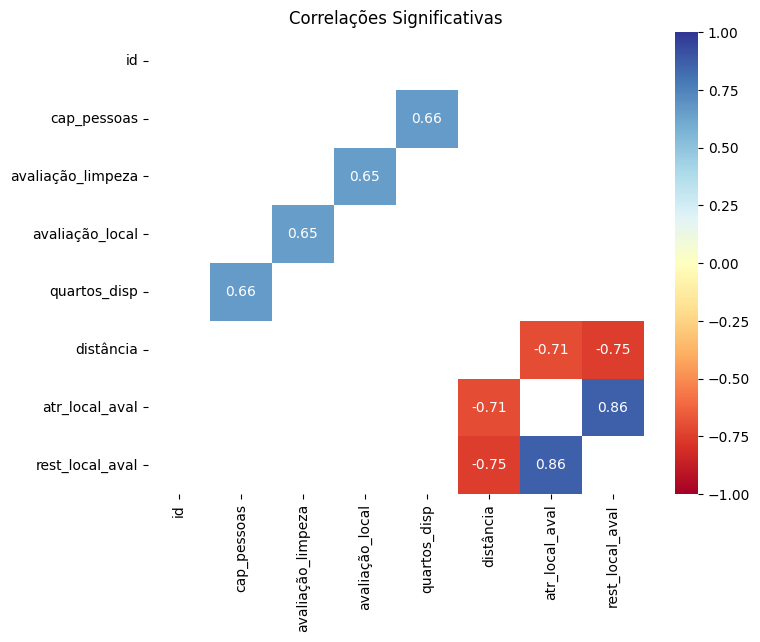

In [ ]:
# HEATMAP

# Legenda: identificação das correlações mais fortes, próximas de 1 e -1

import seaborn as sns
import matplotlib.pyplot as plt

# Calculando as correlações
correlacoes = df.corr()

# Filtrando as correlações significativas
correlacoes_filtradas = correlacoes[((correlacoes >= 0.6) & (correlacoes < 1)) | ((correlacoes <= -0.6) & (correlacoes > -1))]

# Criando o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes_filtradas, annot=True, cmap='RdYlBu', vmin=-1, vmax=1)

# Configurando o título
plt.title('Correlações Significativas')

# Exibindo o mapa de calor
plt.show()


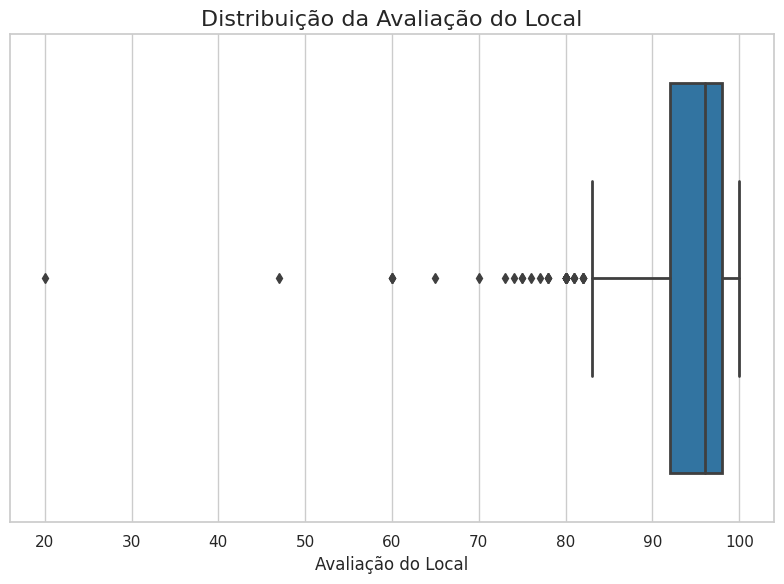

In [ ]:
# BOXPLOT

# Existem Outliers inferiores

# Legenda: Com esse gráfico podemos analisar que as avaliações gerais em relação ao local, são altas

import seaborn as sns
import matplotlib.pyplot as plt

# configurar estilo do Seaborn
sns.set(style='whitegrid')

# configurar tamanho do gráfico
plt.figure(figsize=(8, 6))

# configurar paleta de cores
colors = ['#1f77b4']

# gráfico de boxplot
sns.boxplot(x='avaliação_local', data=df, palette=colors, linewidth=2)

# título e rótulos dos eixos
plt.title('Distribuição da Avaliação do Local', fontsize=16)
plt.xlabel('Avaliação do Local', fontsize=12)
plt.ylabel('')

# ajustar o espaçamento dos subplots
plt.tight_layout()

# exibir o gráfico
plt.show()


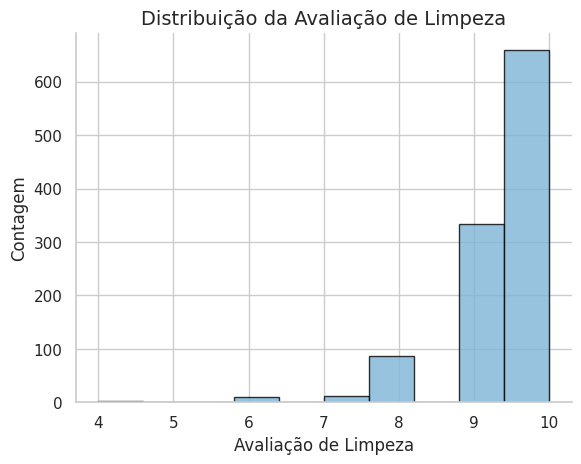

<Figure size 800x600 with 0 Axes>

In [ ]:
# HISTOGRAMA

# Lengenda: As avaliações em relação a limpeza do local são altas

import matplotlib.pyplot as plt
import seaborn as sns

# estilo seaborn
sns.set(style='whitegrid')

# histograma com cores e formatação
plt.hist(df['avaliação_limpeza'], bins=10, edgecolor='black', color='#7eb5d6', alpha=0.8)

# rótulos e títulos
plt.xlabel('Avaliação de Limpeza', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.title('Distribuição da Avaliação de Limpeza', fontsize=14)

# eixos direito e superior
sns.despine()

# tamanho da figura
plt.figure(figsize=(8, 6))

# Exibir o histograma
plt.show()


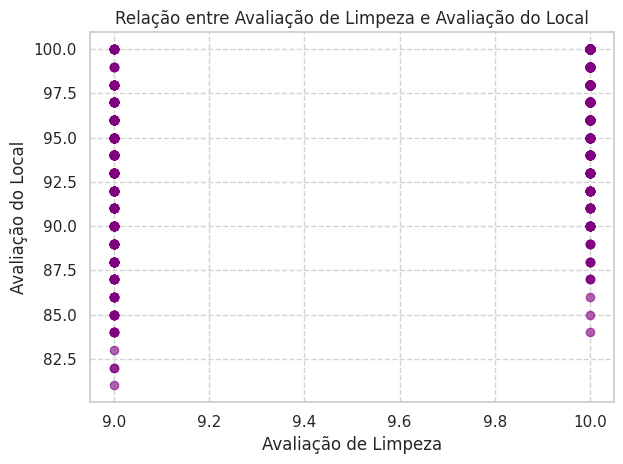

In [ ]:
# DISPERSÃO

# Legenda: a avaliação de limpeza tem correlação diretamente proporcional com a avaliação do local

# Quando uma é alta a outra também é alta

import matplotlib.pyplot as plt

# aplicar o filtro aos dados
df_filtrado = df.loc[filtro]

# criar o gráfico de dispersão com cores personalizadas
plt.scatter(df_filtrado['avaliação_limpeza'], df_filtrado['avaliação_local'], color='purple', alpha=0.6)

# configurar os eixos e rótulos
plt.xlabel('Avaliação de Limpeza')
plt.ylabel('Avaliação do Local')
plt.title('Relação entre Avaliação de Limpeza e Avaliação do Local')

# adicionar uma grade de fundo
plt.grid(color='lightgray', linestyle='--')

# ajustar o espaçamento dos subplots
plt.tight_layout()

# exibir o gráfico
plt.show()


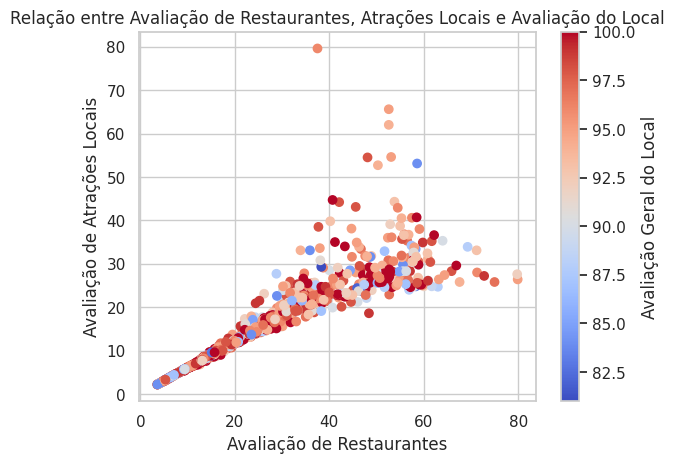

In [ ]:
# DISPERSÃO

#Legenda: a avaliação geral do local não é influenciada por baixas avaliações de restaurantes e atrações locais

df_filtrado = df.loc[filtro4]

# gráfico de dispersão
plt.scatter(df_filtrado['rest_local_aval'], df_filtrado['atr_local_aval'], c=df_filtrado['avaliação_local'], cmap='coolwarm')

# eixos e rótulos
plt.xlabel('Avaliação de Restaurantes')
plt.ylabel('Avaliação de Atrações Locais')
plt.title('Relação entre Avaliação de Restaurantes, Atrações Locais e Avaliação do Local')

# barra de cores
cbar = plt.colorbar()
cbar.set_label('Avaliação Geral do Local')

# Exibir o gráfico
plt.show()



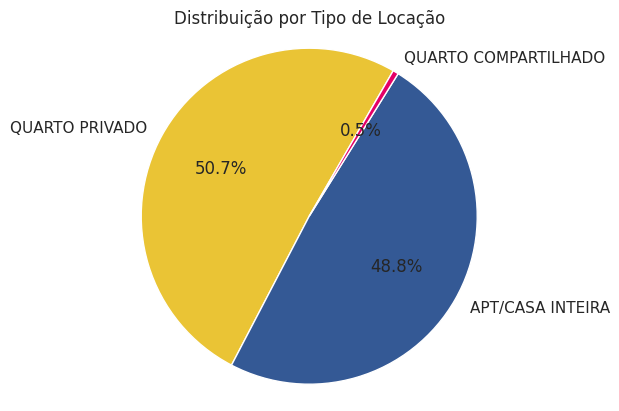

In [ ]:
# SETORES

'''
Legenda

50.7% dos anúncios: quartos privados
48.8% dos anuncios: Apto/casa inteira
0.5% dos anuncios: de quartos compartilhados
'''

import matplotlib.pyplot as plt

# contar o número de ocorrências de cada tipo de locação
contagem_tipo_locacao = df['tipo_de_locação'].value_counts()

# obter as categorias e as contagens
categorias = contagem_tipo_locacao.index
contagens = contagem_tipo_locacao.values

cores = ['#EAC435', '#345995', '#E40066', '#03CEA4', '#FB4D3D']

# criar o gráfico de setores com as cores definidas
plt.pie(contagens, labels=categorias, colors=cores, autopct='%1.1f%%', startangle=60)

# configurar o aspecto do gráfico
plt.axis('equal')  # para garantir que o gráfico seja circular
plt.title('Distribuição por Tipo de Locação')

# exibir o gráfico
plt.show()


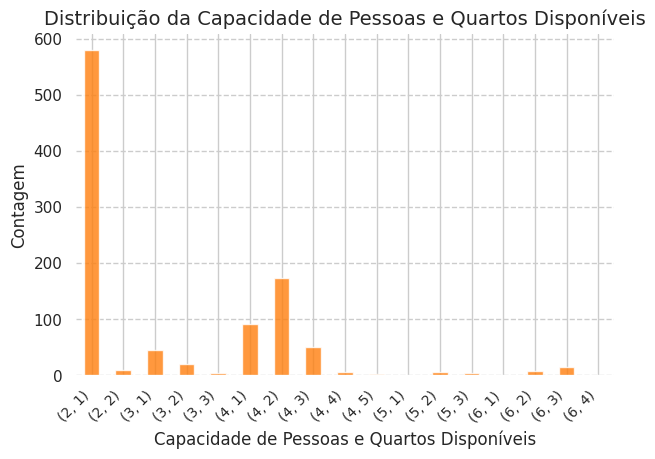

In [ ]:
# BARRAS

# Legenda: a maioria das acomodações oferecidas possui capacidade para duas pessoas e um único quarto.

import matplotlib.pyplot as plt

df_filtrado = df.loc[filtro7]

contagem = df_filtrado.groupby(['cap_pessoas', 'quartos_disp']).size()

# criar o gráfico de barras
contagem.plot(kind='bar', color='#ff7f0e', alpha=0.8)

# rótulos e títulos
plt.xlabel('Capacidade de Pessoas e Quartos Disponíveis', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.title('Distribuição da Capacidade de Pessoas e Quartos Disponíveis', fontsize=14)

# espaçamento entre as barras
plt.tight_layout()

# remover a moldura do gráfico
plt.box(False)

# remover os eixos da direita e de cima
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# adicionar grade horizontal
plt.grid(axis='y', linestyle='--')

# personalizar a cor das bordas das barras
plt.gca().spines['left'].set_color('#c0c0c0')
plt.gca().spines['bottom'].set_color('#c0c0c0')

# personalizar os rótulos do eixo x
plt.xticks(rotation=45, ha='right', fontsize=10)

# exibir o gráfico de barras
plt.show()


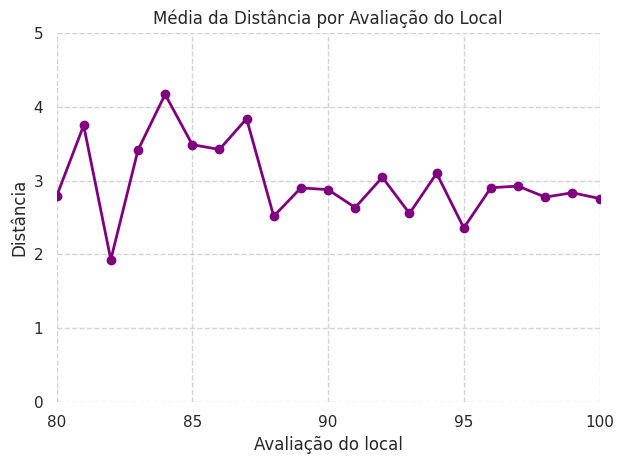

In [ ]:
# LINHAS

# Legenda: a distancia com o centro da cidade não está diretamente relacionada com a boa avaliação do local

import matplotlib.pyplot as plt

# agrupar os dados por quartos disponíveis e calcular a média da distância
agrupado = df.groupby('avaliação_local')['distância'].mean()

# categorias e os valores médios
categorias = agrupado.index
valores = agrupado.values

# criar o gráfico de linhas
plt.plot(categorias, valores, color='purple', linewidth=2, marker='o', markersize=6)

# personalizar os limites e ticks dos eixos
plt.xlim(80, 100)
plt.ylim(0, 5)
plt.xticks(range(80, 101, 5))
plt.yticks(range(0, 6))

# adicionar uma grade de fundo
plt.grid(color='lightgray', linestyle='--')

# configurar os rótulos e títulos
plt.xlabel('Avaliação do local')
plt.ylabel('Distância')
plt.title('Média da Distância por Avaliação do Local')

# remover as bordas da figura
plt.box(False)

# ajustar o espaçamento dos subplots
plt.tight_layout()

# exibir o gráfico
plt.show()


# **Análise SWOT**

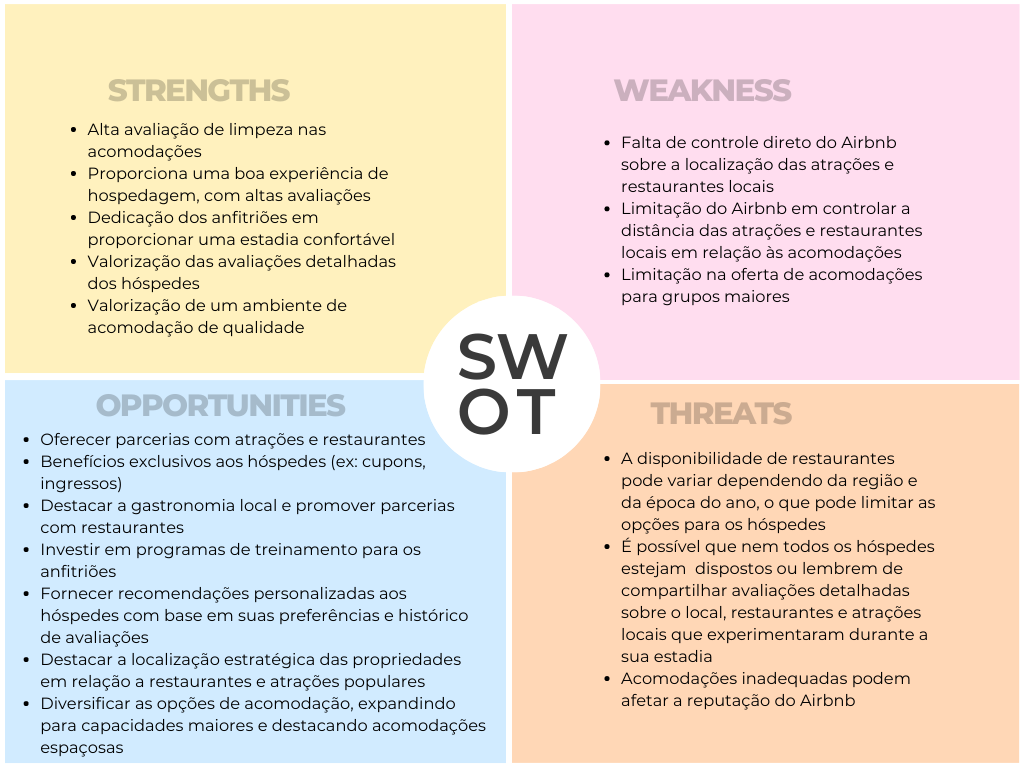

#**CONCLUSÃO**


- Existe uma alta correlação entre a avaliação de limpeza e a avaliação local, indicando a importância da limpeza nas percepções dos hóspedes sobre o local.

- A distância das atrações locais pode impactar as notas atribuídas pelos hóspedes, com uma tendência de notas mais baixas para distâncias maiores.

- A proximidade dos restaurantes pode influenciar positivamente as notas dos hóspedes, sugerindo a importância da conveniência gastronômica.

- A maioria das acomodações oferecidas possui capacidade para duas pessoas e um único quarto, mas existem opções para grupos maiores com dois quartos. É possível melhorar a oferta para acomodações maiores, para ter mais opções.

- Algumas acomodações distantes das atrações locais recebem avaliações positivas, indicando que a distância não é um fator determinante na experiência dos hóspedes.

- O Airbnb pode oferecer recomendações personalizadas com base nas preferências dos hóspedes, promovendo opções gastronômicas e atrações locais de qualidade.

- O Airbnb pode buscar parcerias, destacar acomodações espaçosas e fornecer informações detalhadas sobre opções de qualidade nas redondezas.

- O Airbnb pode estabelecer parcerias com atrações locais populares, oferecendo benefícios exclusivos para os hóspedes, como ingressos com desconto, acesso prioritário ou experiências exclusivas. Isso proporcionaria aos hóspedes uma experiência diferenciada e incentivaria a visita às atrações locais, mesmo que estejam um pouco mais distantes.


- O Airbnb e os anfitriões devem se concentrar em fornecer uma experiência de hospedagem excepcional, considerando a estrutura da acomodação, a limpeza, o conforto e as comodidades oferecidas.

#DASHBOARD

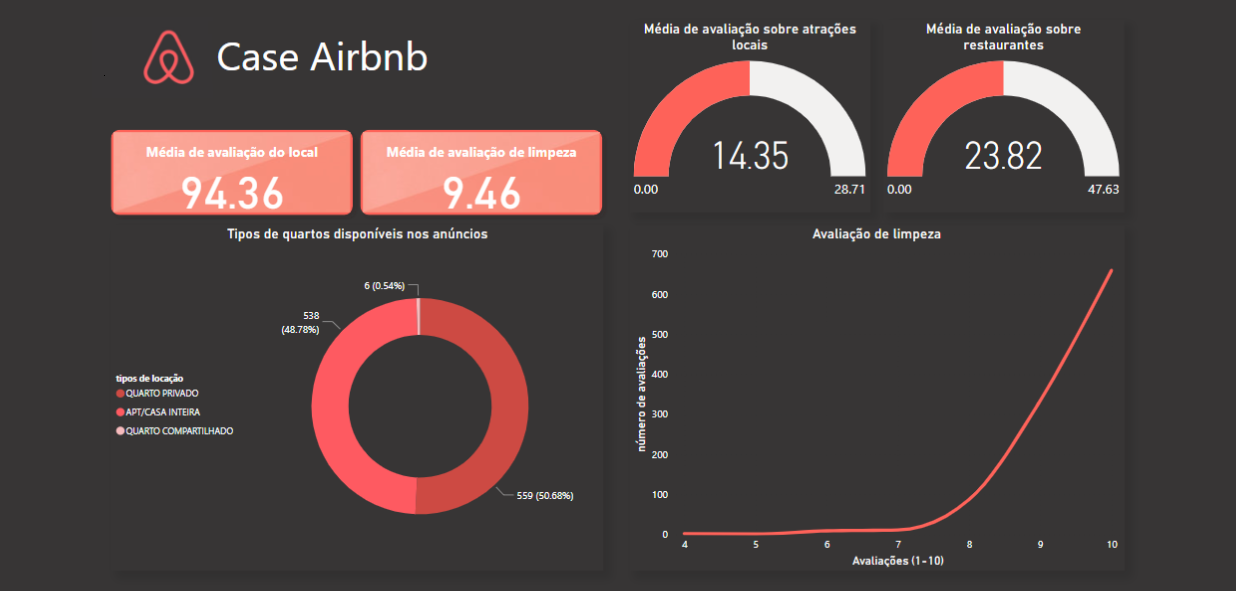